In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

In [41]:
#obliczenie jednostki maszynowej
epsilon = 0.5
while True:
    if 1 + epsilon != 1:
        epsilon = epsilon/2
    else:
        print("Jednostka maszynowa tej jednostki to : {}".format(epsilon))
        break

Jednostka maszynowa tej jednostki to : 1.1102230246251565e-16


In [61]:
def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while np.sign(f1) == np.sign(f2):
        if x1 >= b: return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1,x2

def bisection(f,x1,x2,switch=1,tol=1.0e-9):
    f1 = f(x1)
    if f1 == 0.0: return x1
    f2 = f(x2)
    if f2 == 0.0: return x2
    if np.sign(f1) == np.sign(f2):
        raise ValueError("Znaki są równe")
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0: return x3
        if np.sign(f2)!= np.sign(f3): x1 = x3; f1 = f3
        else: x2 = x3; f2 = f3

    return (x1 + x2)/2.0

def newton(f,Df,x0,epsilon,maxit= 10**5):
    xn = x0
    for n in range(0,maxit):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print("Found solution after",n,"iterations.")
            return xn, n 
        Dfxn = Df(xn)
        if Dfxn == 0:
            print("Zero derivative. No solution found.")
            return None
        xn = xn - fxn/Dfxn
    print("Exceeded maximum iterations. No solution found.")
    return None
 
def secant_method(x0, x1, tol=1e-6, max_iter=100):
    add_mul_count = 0
 
    for iteration in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        add_mul_count += 6  # Obliczenie dwóch wartości funkcji i mnożenie/dzielenie
 
        if abs(f_x1 - f_x0) < 1e-12:
            raise ZeroDivisionError("Dzielenie przez zero w metodzie siecznych")
 
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        add_mul_count += 3  # Mnożenie i odejmowanie
 
        if abs(x2 - x1) < tol:
            return x2, iteration + 1, add_mul_count
 
        x0, x1 = x1, x2
 
    raise RuntimeError("Metoda siecznych nie skonwergowała w zadanej liczbie iteracji")
 
def brent_method(f,a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Funkcja musi zmieniać znak w przedziale [a, b]")
 
    fa = f(a)
    fb = f(b)
    add_mul_count = 3  # Obliczenie f(a) i f(b)
 
    if abs(fa) < abs(fb):
        a, b = b, a
        fa, fb = fb, fa
 
    c = a
    fc = fa
    s = b
    d = b - a
 
    for iteration in range(max_iter):
        if fb != fc and fa != fc:
            # Interpolacja paraboliczna
            s = a * fb * fc / ((fa - fb) * (fa - fc)) + \
                b * fa * fc / ((fb - fa) * (fb - fc)) + \
                c * fa * fb / ((fc - fa) * (fc - fb))
            add_mul_count += 12
        else:
            # Metoda siecznych
            s = b - fb * (b - a) / (fb - fa)
            add_mul_count += 3
 
        if not (a < s < b):
            s = (a + b) / 2
            add_mul_count += 2
 
        fs = f(s)
        add_mul_count += 3
 
        d, a = b - a, b
        fa = fb
 
        if abs(fs) < tol:
            return s, iteration + 1, add_mul_count
 
        b = s
        fb = fs
 
    raise RuntimeError("Metoda Brenta nie skonwergowała w zadanej liczbie iteracji")

# Zadanie 1

In [43]:
def f(x):
    return np.tan(np.pi - x) - x

def df(x):
    return -1 * (1/np.cos(x))**2 - 1

In [44]:
 
# Przykładowe dane wejściowe
a, b = 2, 3  # Przedział dla metod bisekcji i Brenta
x0 = 2.5     # Początkowe przybliżenie dla metod Newtona i siecznych
x1 = 2.7     # Drugie przybliżenie dla metody siecznych
 
# Rozwiązanie metodą bisekcji
# try:
    # root_bisection, iterations_bisection, ops_bisection = bisection_method(a, b)
    # print(f"Metoda bisekcji: pierwiastek = {root_bisection:.6f}, liczba iteracji = {iterations_bisection}, operacje = {ops_bisection}")
# except Exception as e:
    # print(f"Metoda bisekcji zakończona błędem: {e}")
 
# Rozwiązanie metodą Newtona
try:
    root_newton, iterations_newton = newton(f, df, x0, 1e-6, 100)
    print(f"Metoda Newtona: pierwiastek = {root_newton:.6f}, liczba iteracji = {iterations_newton}")
except Exception as e:
    print(f"Metoda Newtona zakończona błędem: {e}")
 
# Rozwiązanie metodą siecznych
# try:
    # root_secant, iterations_secant, ops_secant = secant_method(x0, x1)
    # print(f"Metoda siecznych: pierwiastek = {root_secant:.6f}, liczba iteracji = {iterations_secant}, operacje = {ops_secant}")
# except Exception as e:
    # print(f"Metoda siecznych zakończona błędem: {e}")
 
# Rozwiązanie metodą Brenta
# try:
    # root_brent, iterations_brent, ops_brent = brent_method(a, b)
    # print(f"Metoda Brenta: pierwiastek = {root_brent:.6f}, liczba iteracji = {iterations_brent}, operacje = {ops_brent}")
# except Exception as e:
    # print(f"Metoda Brenta zakończona błędem: {e}")

Found solution after 6 iterations.
Metoda Newtona: pierwiastek = 2.028758, liczba iteracji = 6


# Zadanie 2


In [45]:
def f(x):
    return np.cosh(x)*np.cos(x) - 1
def df(x):
    return np.cos(x)*np.sinh(x)-np.sin(x)*np.cosh(x)
def ddf(x):
    return -2*np.sin(x)*np.sinh(x)

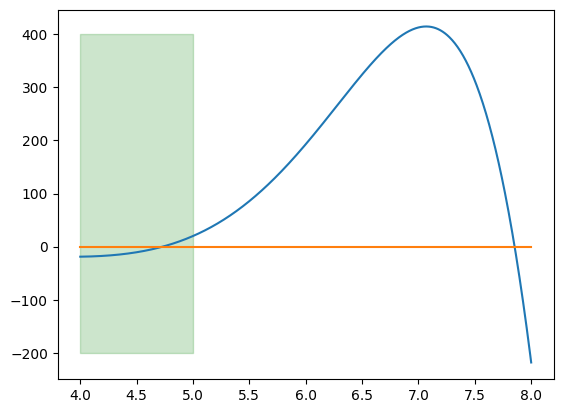

In [46]:
x_range = np.linspace(4,8,1000)
x_range2 = np.linspace(4,5,1000)
plt.plot(x_range,f(x_range))
plt.plot(x_range,np.zeros(len(x_range)))
plt.fill_betweenx(np.linspace(400,-200),4,5,color="green",alpha = 0.2)

sprawdzenie warunków

-377.9500203579088


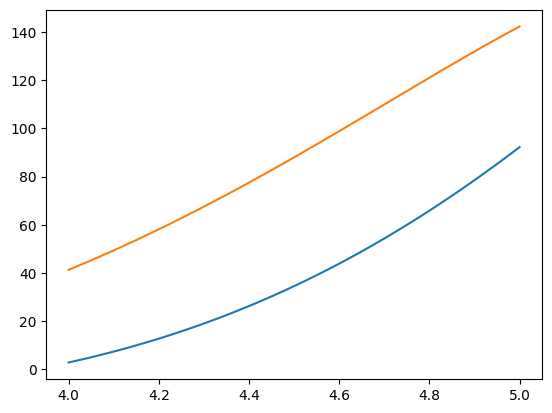

In [47]:
print(f(4)*f(5))
plt.plot(x_range2,df(x_range2))
plt.plot(x_range2,ddf(x_range2))

rozwiązanie za pomocą metody newtona

In [48]:
x_0 = 4
newton(f,df,x_0,epsilon)

Exceeded maximum iterations. No solution found.


kaput. i tak ma być, opisać wszystko

# Zadanie 4

przybliżamy sobie przedział zawierający pierwiastek sami na podstawie wykresu lub używamy rootsearch

In [49]:
def G(T):
    return -8.31441*T*np.log(np.power(T/4.44418,5/2))

def f(x):
    return G(x) + 10**5


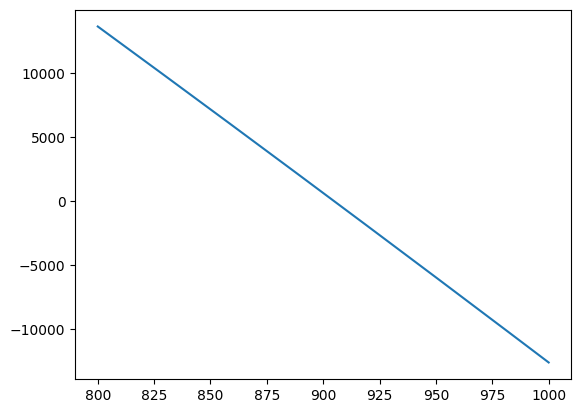

In [50]:
a = 800
b = 1000
x_range = np.linspace(a,b,10**6)
plt.plot(x_range, f(x_range))

In [51]:
root, iterations = bisection(f, a, b)
print(root)

904.942583232696


# Zadanie 6

Na początku zdefiniujemy nasz wielomian na dwa różne sposoby, który ułatwi nam kompilację. Funkcja w(x) przyjmuje x jako wartość rzeczywistą, a funkcja w_j przymuje x jako urojoną część liczby zespolonej (bez części rzeczywistej). W ten sposób znajdziemy również rzeczywiste jak i urojone pierwiastki tego wielomianu

In [69]:
def w(x):
    return x**4 + (5+1j)*x**3 - (8-5j)*x**2 + (30-14j)*x - 84 

def w_j(x):
    return (x*1j)**4 + (5+1j)*(x*1j)**3 - (8-5j)*(x*1j)**2 + (30-14j)*(x*1j) - 84 

Na początek stworzymy przestrzeń liczb zespolonych na macierzy 40x40 , zaczynając od -10-10i. Wiersze będą zwiększały część urojoną o 0.5, a kolumny będą zwiększały część rzeczywistą o 0.5. Następnie na tę macierz nałożymy naszą funkcję i sprawdzimy jak ona się zachowuje.

In [53]:
x_range = np.linspace(-10, 10, 41)
x_range_i = np.linspace(-10, 10, 41)
real_part, imag_part = np.meshgrid(x_range, x_range_i)
complex_matrix = real_part + 1j * imag_part
w_values = w(complex_matrix).real + w(complex_matrix).imag

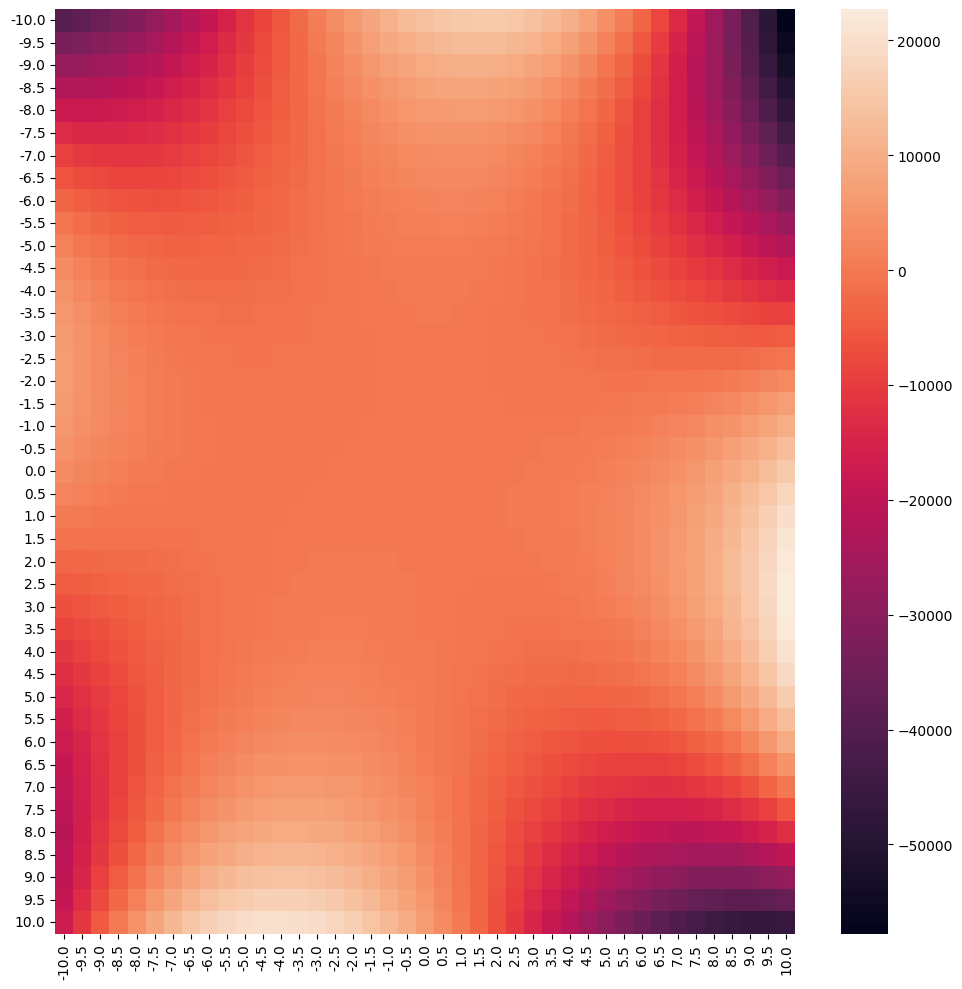

In [54]:
fig, axes = plt.subplots(1, figsize=(10, 10))
sb.heatmap(w_values,xticklabels=np.round(x_range,1),yticklabels=np.round(x_range_i,1))
plt.tight_layout()
plt.show()

Dla ułatwienia możemy zaznaczyć same zera na wykresie

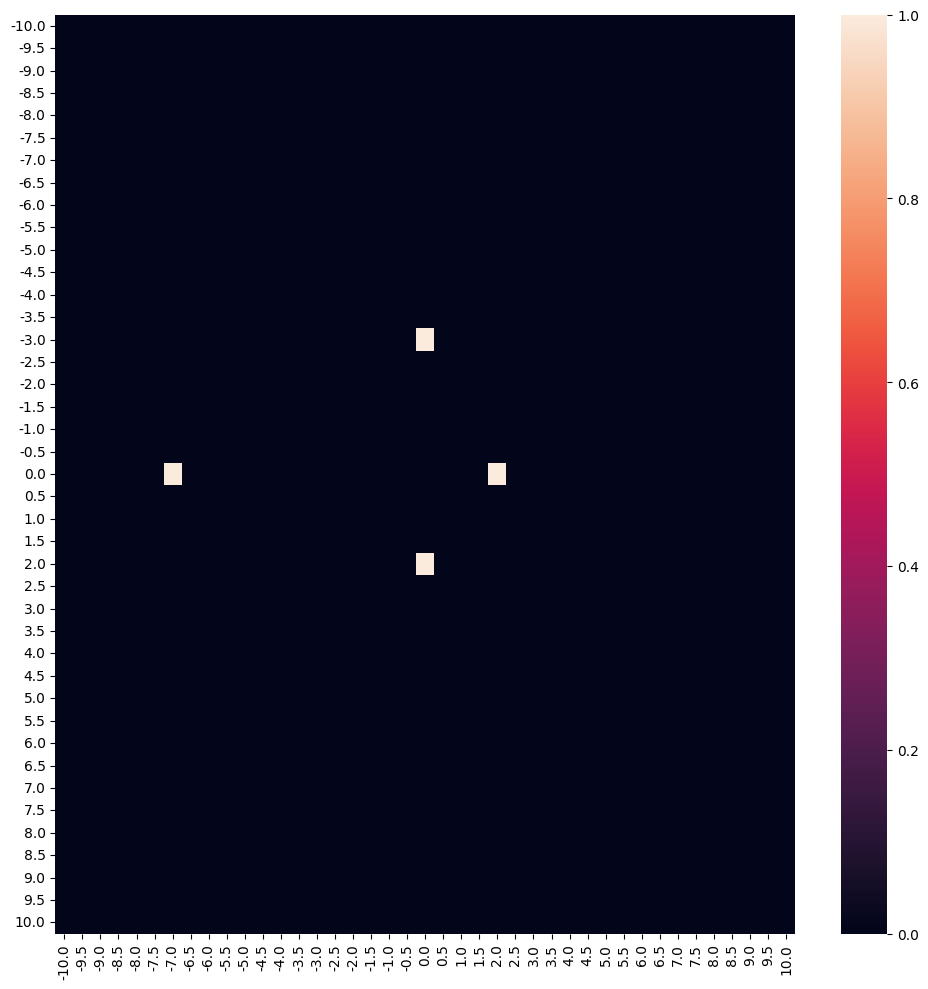

In [55]:
fig, axes = plt.subplots(1, figsize=(10, 10))
sb.heatmap(w_values==0,xticklabels=np.round(x_range,1),yticklabels=np.round(x_range_i,1))
plt.tight_layout()
plt.show()

Widać tutaj, że wielomian ma cztery pierwiastki, które są odpowiednio dwoma liczbami rzeczywistymi i dwoma urojonymi. Możemy zatem poszukać ich odpowiednio podając do wielomianu argumenty rzeczywiste i urojone

### Argumenty rzeczywiste

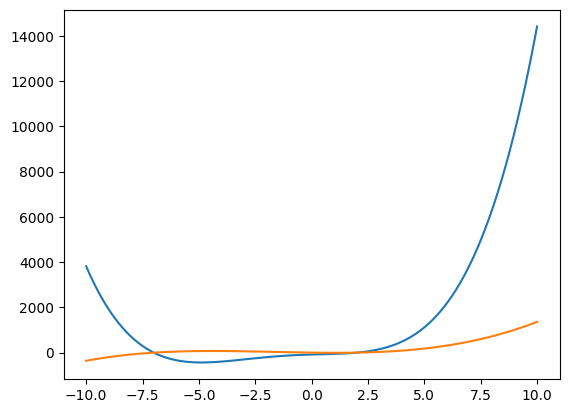

In [56]:
x_range = np.linspace(-10,10,10**4)
w_real = w(x_range).real
w_imag = w(x_range).imag
plt.plot(x_range,w_real)
plt.plot(x_range,w_imag)


Na powyższym wykresie widzimy część rzeczywistą i urojoną wielomianu. Aby argument był pierwiastkiem, to część rzeczywista oraz urojona muszą jednocześnie wynosić 0, zatem określimy ich sumę:

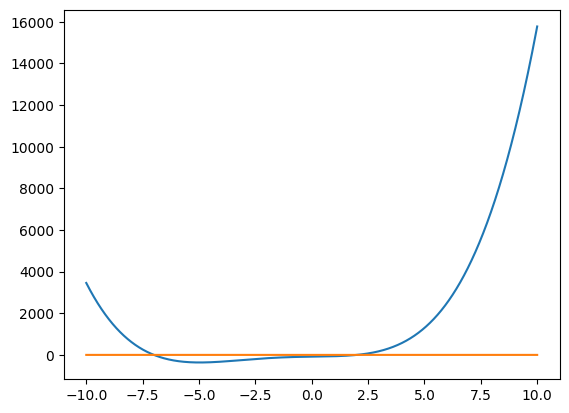

In [57]:
plt.plot(x_range,w_real+w_imag)
plt.plot(x_range,np.zeros(len(x_range)))

Bazując na powyższym wykresie możemy zacieśnić przeszukiwany przedział do [-8,3] 

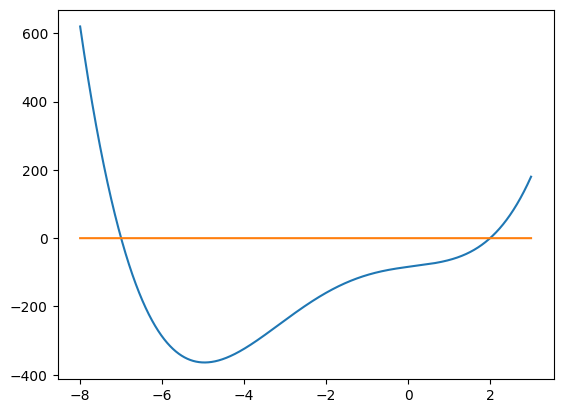

In [62]:
a=-8
b= 3
x_range = np.linspace(a,b,10**4)
w_real = w(x_range).real
w_imag = w(x_range).imag
# plt.plot(x_range,w_real)
# plt.plot(x_range,w_imag)
plt.plot(x_range,w_real+w_imag)
plt.plot(x_range,np.zeros(len(x_range)))

Z wykresu możemy odczytać, że pierwszy pierwiastek leży między -8 a -6, zaś durgi między 1 a 3. Następnie na tych przedziałach korzystamy z metody bisekcji:

In [78]:
x_1, x_2 = -8,-6
x_3, x_4 = 1 , 3
root_1 = bisection(w,x_1,x_2)
root_2 = bisection(w,x_3,x_4)
print("Pierwiastki: {}, {}".format(root_1, root_2))
print("Test:")
print(w(root_1), w(root_2))

Pierwiastki: -7.0, 2.0
Test:
0j 0j


Analogicznie postępujemy poszukując pierwiastków z argumentów urojonych

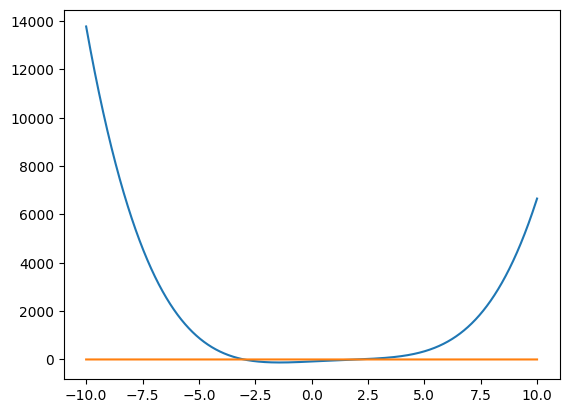

In [71]:
x_range = np.linspace(-10,10,10**4)
w_real = w_j(x_range).real
w_imag = w_j(x_range).imag
plt.plot(x_range,w_real+w_imag)
plt.plot(x_range,np.zeros(len(x_range)))

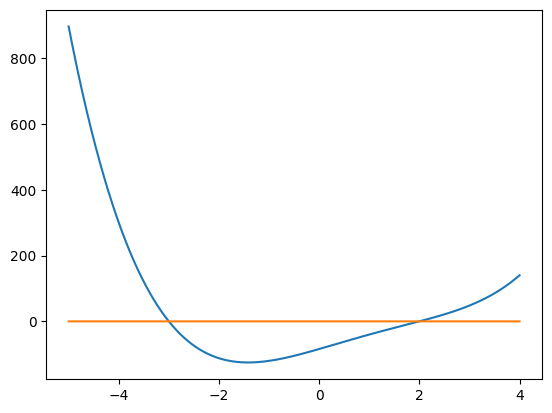

In [70]:
a=-5
b= 4
x_range = np.linspace(a,b,10**4)
w_real = w_j(x_range).real
w_imag = w_j(x_range).imag
plt.plot(x_range,w_real+w_imag)
plt.plot(x_range,np.zeros(len(x_range)))

In [77]:
x_1, x_2 = -4,-2
x_3, x_4 = 1 , 3


root_1 = bisection(w_j,x_1,x_2)
root_2 = bisection(w_j,x_3,x_4)
print("Pierwiastki: {}, {}".format(root_1*1j,root_2*1j))
print("Test:")
print(w_j(root_1),w_j(root_2))

Pierwiastki: (-0-3j), 2j
Test:
0j 0j


Ostatecznie otrzymaliśmy, że naszymi pierwiastkami są: -7, 2 -3i oraz 2i